In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.array([[0],[0]])

array([[0],
       [0]])

In [3]:
np.array([[0],[0]]).reshape(2,1)

array([[0],
       [0]])

In [5]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [6]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.001, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
#         print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [13]:
import pandas as pd
data_df = pd.read_csv('~/OneDrive/Datasets/House Prices - Reg.csv')

In [14]:
data_df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [15]:
data_df = data_df.loc[:,['Price','LivingArea']]
data_df.columns=['y','X']
data_df.head()

,y,X
0,16858,1629
1,26049,1344
2,26130,822
3,31113,1540
4,40932,1320


In [16]:
n_rows = data_df.shape[0]
X=data_df['X'].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X=(X-np.mean(X))/np.std(X)
X = np.concatenate((ones, X), axis=1)
y=data_df['y'].to_numpy().reshape(n_rows,1)
y=(y-np.mean(y))/np.std(y)

In [18]:
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y,theta=np.array([[1],[1]]),alpha=.1,num_iterations=40)

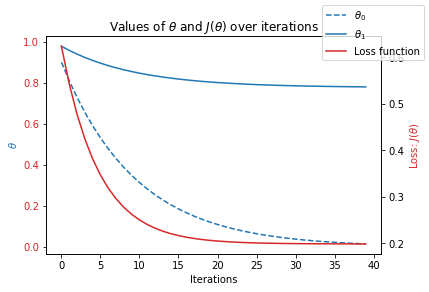

In [19]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [20]:
print(min(theta1_history),max(theta1_history))

0.779701508000028 0.9776396450103721


In [21]:
%%time
# theta range
theta0_vals = np.linspace(-1,2,100)
theta1_vals = np.linspace(-1,2,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 4.79 s, sys: 8.88 ms, total: 4.8 s
Wall time: 4.8 s


In [22]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab'

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Plot Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))
fig.show()

In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

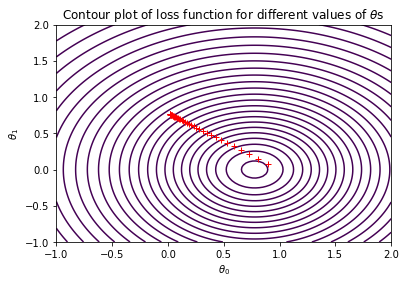

In [27]:
num_iterations=40
theta_init=np.array([[1],[0]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-2,3,100))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history, theta1_history, 'r+')

In [31]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        theta0 = 0
        theta1 = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            theta0_gradient = -2 * np.sum(y - theta1*X + theta0) / n
            theta1_gradient = -2 * np.sum(X*(y - (theta1*X + theta0))) / n
            theta0 = theta0 + (self.learning_rate * theta0_gradient)
            theta1 = theta1 - (self.learning_rate * theta1_gradient)
        self.theta1, self.theta0 = theta1, theta0
        
    def predict(self, X):
        return self.theta1*X + self.theta0

In [31]:
data_df

,y,X
0,16858,1629
1,26049,1344
2,26130,822
3,31113,1540
4,40932,1320
...,...,...
1042,387652,3504
1043,391842,3003
1044,394532,3361
1045,432845,3250


In [32]:
X = data_df['X']
y = data_df['y']

In [61]:
X_std = (X- X.mean())/(X.std())
y_std = (y- y.mean())/(y.std())

In [62]:
clf = GradientDescentLinearRegression(learning_rate = 0.1,iterations = 40 )
clf.fit(X_std, y_std)

In [63]:
clf.predict(X_std).mean()

3.8513180758725583e-16

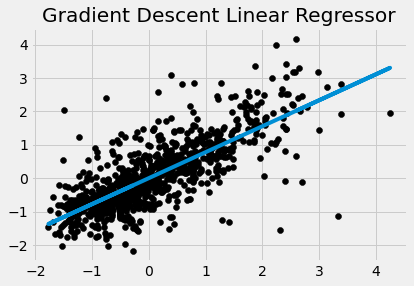

In [64]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.scatter(X_std, y_std, color='black')
plt.plot(X_std, clf.predict(X_std))
plt.gca().set_title("Gradient Descent Linear Regressor")
plt.show()

In [37]:
clf.theta0 # intercept

1.0417221579672915e-16

In [38]:
clf.theta1 # slope

0.7769632504672019